In [172]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic


from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.callbacks import Callback, TensorBoard, ModelCheckpoint
import tensorflow as tf

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

import joblib

# Обработка данных

In [132]:
data = pd.read_csv('winequality-red.csv')

In [133]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [134]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [135]:
x = data.drop(columns = 'quality').to_numpy()
y = data['quality'].to_numpy()

In [136]:
from sklearn import preprocessing
x = preprocessing.scale(x)
x = preprocessing.normalize(x)

from sklearn.preprocessing import LabelEncoder

y = y.reshape(-1)

def preprocessY(data):
    le = LabelEncoder()
    le.fit([3, 4, 5, 6, 7, 8])
    data = le.transform(data) 
    return data
y = preprocessY(y)

In [137]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [138]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [139]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [173]:
def errors(model, x_test, y_test):
  outputs = model.predict(x_test)
  error = np.absolute(outputs - y_test)
  mae = np.sum(error) / len(error)
  error = (outputs - y_test)**2
  mse = np.sum(error) / len(error)
  report = classification_report(y_test, model.predict(x_test), target_names=['5', '6', '7', '4', '8', '3'])
  print("MAE:", mae) #абсолютная ошибка (MAE)
  print("MSE:", mse) #среднеквадратичная ошибка (MSE)
  print("RMSE:", np.sqrt(mse)) #корень среднеквадратичной ошибки (RMSE)
  print(report)

In [141]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Обучение

В зависимости от вашего задания обучаете свой алгоритм

In [142]:
# Создаём модель леса из сотни деревьев
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               warm_start = True,
                               oob_score = True)
# Обучаем на тренировочных данных
model.fit(x_train, y_train)
model.score(x_train, y_train)

1.0

In [143]:
errors(model, x_test, y_test)

MAE: 0.375
MSE: 0.4125
RMSE: 0.6422616289332564
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        10
           7       0.67      0.74      0.70       130
           4       0.61      0.69      0.65       132
           8       0.73      0.45      0.56        42
           3       0.00      0.00      0.00         5

    accuracy                           0.64       320
   macro avg       0.33      0.31      0.32       320
weighted avg       0.62      0.64      0.63       320



C:\Users\komyshev.da\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
# Создаём модель леса XGBoost
model = XGBClassifier(seed=42,
                      n_estimators=200,
                      max_depth=6,
                      learning_rate=0.3)
# Обучаем на тренировочных данных
model.fit(x_train, y_train)
model.score(x_train, y_train)

[11:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


1.0

In [160]:
errors(model, x_test, y_test)

MAE: 0.35
MSE: 0.4
RMSE: 0.6324555320336759
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.33      0.10      0.15        10
           7       0.70      0.77      0.74       130
           4       0.65      0.70      0.67       132
           8       0.70      0.55      0.61        42
           3       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.40      0.35      0.36       320
weighted avg       0.66      0.68      0.66       320



In [161]:
clf = LogisticRegression().fit(x_train, y_train)

In [162]:
clf.score(x_train, y_train)

0.6075058639562158

In [163]:
errors(clf, x_test, y_test)

MAE: 0.45
MSE: 0.50625
RMSE: 0.7115124735378854
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        10
           7       0.62      0.74      0.67       130
           4       0.54      0.61      0.57       132
           8       0.56      0.21      0.31        42
           3       0.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.29      0.26      0.26       320
weighted avg       0.55      0.58      0.55       320



C:\Users\komyshev.da\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
poly = PolynomialFeatures(10)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

linear_model = LinearRegression()
poly_model = LinearRegression()

In [174]:
linear_model.fit(x_train, y_train)
linear_model.score(x_train, y_train)
errors(linear_model, x_test, y_test)

MAE: 0.5055931467733364
MSE: 0.4068678371867577
RMSE: 0.6378619264282496


In [175]:
poly_model.fit(x_train_poly, y_train)
poly_model.score(x_train_poly, y_train)
errors(poly_model, x_test_poly, y_test)

MAE: 0.8438631921347295
MSE: 1.5342300286593074
RMSE: 1.2386403952153777


In [177]:
y_train = tf.keras.utils.to_categorical(y_train, 6)
y_test = tf.keras.utils.to_categorical(y_test, 6)

In [189]:
model = Sequential()
model.add(Dense(units = 22, activation = "relu", input_dim = 11, use_bias=True))
model.add(Dense(units = 22, activation = "relu", use_bias=True))
model.add(Dense(units = 22, activation = "relu", use_bias=True))

model.add(Dense(units = 6, activation = "softmax"))

model.compile(loss = "mean_squared_error",
             optimizer = optimizers.Adam(lr = 0.01),
              metrics = ["accuracy"])
model.summary()

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history = model.fit(x_train,y_train,
epochs = 100,
batch_size = 1,
verbose = 1,
validation_data = (x_test,y_test),
callbacks=[checkpoint])

score = model.evaluate(x_test,y_test,verbose = 1)
print("test loss:",score[0])
print("test accuracy:",score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 22)                264       
_________________________________________________________________
dense_23 (Dense)             (None, 22)                506       
_________________________________________________________________
dense_24 (Dense)             (None, 22)                506       
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 138       
Total params: 1,414
Trainable params: 1,414
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.0982 - accuracy: 0.5371 - val_loss: 0.0949 - val_accuracy: 0.5469
Epoch 2/100
1279/1279 [==============================] - 1s 457us/step - loss: 0.0922 - accuracy: 0.5934 

1279/1279 [==============================] - 1s 485us/step - loss: 0.0768 - accuracy: 0.6904 - val_loss: 0.0922 - val_accuracy: 0.6094
Epoch 46/100
1279/1279 [==============================] - 1s 497us/step - loss: 0.0773 - accuracy: 0.6755 - val_loss: 0.0922 - val_accuracy: 0.6125
Epoch 47/100
1279/1279 [==============================] - 1s 464us/step - loss: 0.0770 - accuracy: 0.6833 - val_loss: 0.0940 - val_accuracy: 0.5938
Epoch 48/100
1279/1279 [==============================] - 1s 478us/step - loss: 0.0771 - accuracy: 0.6716 - val_loss: 0.0977 - val_accuracy: 0.5719
Epoch 49/100
1279/1279 [==============================] - 1s 474us/step - loss: 0.0768 - accuracy: 0.6873 - val_loss: 0.0963 - val_accuracy: 0.5844
Epoch 50/100
1279/1279 [==============================] - 1s 445us/step - loss: 0.0794 - accuracy: 0.6740 - val_loss: 0.0992 - val_accuracy: 0.5750
Epoch 51/100
1279/1279 [==============================] - 1s 488us/step - loss: 0.0763 - accuracy: 0.6927 - val_loss: 0.0980 

10/10 [==============================] - 0s 598us/step - loss: 0.0992 - accuracy: 0.5719
test loss: 0.09922425448894501
test accuracy: 0.5718749761581421


Text(0, 0.5, 'loss')

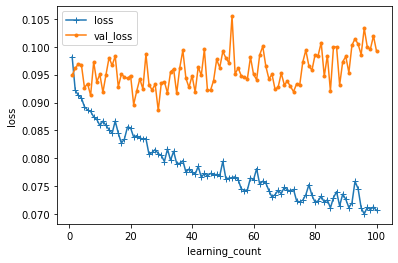

In [190]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

learning_count = len(loss)+1

plt.plot(range(1,learning_count),loss,marker = "+",label = "loss")
plt.plot(range(1,learning_count),val_loss,marker = ".",label = "val_loss")
plt.legend(loc = "best",fontsize = 10)
plt.xlabel("learning_count")
plt.ylabel("loss")

Text(0, 0.5, 'acc')

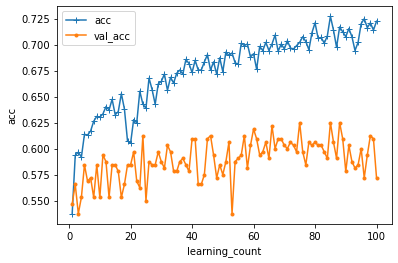

In [191]:
loss = history.history["accuracy"]
val_loss = history.history["val_accuracy"]

learning_count = len(loss)+1

plt.plot(range(1,learning_count),loss,marker = "+",label = "acc")
plt.plot(range(1,learning_count),val_loss,marker = ".",label = "val_acc")
plt.legend(loc = "best",fontsize = 10)
plt.xlabel("learning_count")
plt.ylabel("acc")